# Đặt và trả lời câu hỏi

Notebook này thực hiện việc phân tích, đặt câu hỏi và visualization câu trả lời.

## Import các thư viện cần thiết

Trước hết, chúng ta sẽ import các thư viện cần thiết mà chúng ta sẽ sử dụng trong notebook này.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


## Đọc file dữ liệu

Dữ liệu của chúng ta được lưu trong file 'Anime.csv'. Chúng ta sẽ đọc dữ liệu và lưu vào DataFrame `data_df`. 


In [2]:
data_df = pd.read_csv('anime_after_preproc.csv')
data_df['Start_Aired'] = data_df['Start_Aired'].astype('datetime64')
data_df['End_Aired'] = data_df['End_Aired'].astype('datetime64')
data_df.head(5)

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,2006-10-04,...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,2009-04-05,...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,2015-10-05,...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,2012-07-08,...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


Hiển thị 5 dòng đầu của dữ liệu để xem đọc đúng chưa. 

## Đưa ra các câu hỏi cần trả lời

Qua bước khám phá dữ liệu, nhóm em nhận thấy có một số câu hỏi có thể trả lời bằng dữ liệu như sau:
1. Trong các phim được thu thập, hình thức phim nào nhiều nhất, nhì,...?
    
    Trả lời câu hỏi này giúp các nhà làm phim có thể biết được hình thức nào được ưa chuộng để sản xuất ra các dạng phim nhằm tăng doanh thu trong những năm tiếp theo.
    
    
2. Năm nào có nhiều phim ra mắt nhất, nhì,...?

    Trả lời câu hỏi này giúp chúng ta biết được sản xuất phim cũng là một trong những ngành có tiềm năng nhờ vào sự phát triển tiến bộ của công nghệ. Tuy nhiên thì nhà làm phim cũng nên có những kế hoạch dự phòng cho những năm có điều kiện bất lợi như dịch Covid-19.
    
    
3. Mùa nào xuất bản nhiều phim nhất? Phim xuất bản trong mùa nào có nhiều người quan tâm nhất?

    Trả lời câu hỏi này sẽ biết được vào mùa nào sẽ có nhiều người quan tâm đến phim hơn, như vậy sẽ giảm được chi phí quảng bá và có được nhiều thành tích, doanh thu hơn. Và nếu xuất bản trong mùa vừa được nhiều người quan tâm mà ít phim cạnh tranh thì quá tốt.
    
    
4. Chia theo Demographics thì phim nào được sản xuất nhiều nhất? Phim loại nào có nhiều người xem nhất?

    Trả lời câu hỏi này sẽ biết được thể loại dành cho đối tượng nào (về độ tuổi, giới tính) được quan tâm nhiều hơn, từ đó tác giả có thể lựa chọn hướng đi phù hợp hơn, các nhà sản xuất sẽ có thể tập trung đầu tư hơn đối với các anime thuộc mảng này để đem lại doanh thu cao nhất.
    
    
5. Vậy tình hình sản xuất và số lượng người quan tâm đối với từng thể loại trong cột Denigraphics theo từng mùa như thế nào?

    Đối với từng thể loại sẽ xác định được ra mắt phim vào thời điểm nào trong năm sẽ được nhiều người quan tâm, mùa nào ít đối thủ cạnh tranh để có thể giảm chi phí quảng bá vừa đạt doanh thu cao.


6.  Chủ đề nào thường có những phim hay ?

    Trả lời câu hỏi này sẽ giúp những người đang tìm kiếm anime hay để xem sẽ có những gợi ý rõ ràng hơn để tìm kiếm phim xem.
    
    
7. Anime như thế nào thì dễ trở nên nổi tiếng (được nhiều người biết đến)?

    Trả lời câu hỏi này sẽ giúp chúng ta biết được đặc điểm chung của các anime nổi tiếng.

    Đối với người mục đích là xem có thể không có tác dụng to lớn.
    
    Đối với người mục đích là cho người khác xem thì là những thông tin hữu ích. 
    
    Đối với người đam mê dữ liệu thì là một thông tin rất thú vị.

## Tìm câu trả lời cho các câu hỏi

Trong lúc trả lời các câu hỏi, sẽ có những chỗ cần vẽ các biểu đồ, trực quan hóa kết quả.

Biểu đồ cột nằm ngang:

In [3]:
def draw_barh_chart(df, col1, col2, title, x_label, y_label, x_limit = None):
    fig, ax = plt.subplots(figsize = (15, 6))
    bars = ax.barh(df[::-1][col1], df[::-1][col2])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if x_limit is not None:
        ax.set_xlim(x_limit)
    plt.bar_label(bars);

### Câu hỏi 1: Trong các phim được thu thập, hình thức phim nào nhiều nhất, nhì,...?

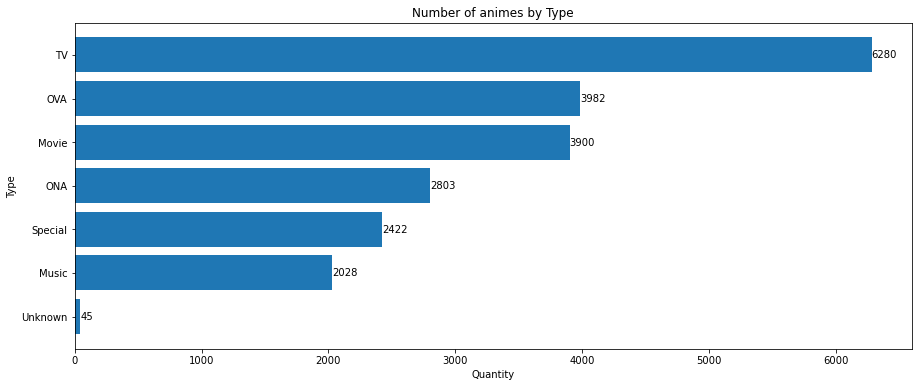

In [4]:
data_df.Type = pd.Categorical(data_df['Type'], categories=['TV', 'OVA', 'Movie', 'ONA', 'Special', 'Music', 'Unknown'])
type_count = data_df.value_counts('Type').rename('Quantity').reset_index()
draw_barh_chart(type_count, 'Type', 'Quantity', 'Number of animes by Type', 'Quantity', 'Type')

Như vậy, số lượng phim hoạt hình thuộc dạng TV chiếm nhiều nhất, tiếp theo là OVA và Movie. Các lý do có thể là:
- TV là dạng dễ sản xuất.
- TV là dạng được yêu thích nhất đối với người xem.
- ...

Chúng ta cùng vẽ thêm 1 số biểu đồ để xem lí do thực sự là gì thông qua dữ liệu!

Hàm bổ trợ để tính trung bình thông qua trọng số. Ví dụ 'col1' là số điểm được chấm cho các anime, 'col2' là số người chấm điểm. Hàm trả về trung bình (điểm * số người chấm):

In [5]:
def weighted_avg(df, col1, col2):
    df = df[~(df[col1].isnull() | df[col2].isnull())]
    if len(df) == 0:
        return np.NaN
    return np.average(df[col1], weights = df[col2])

#### Vẽ biểu đồ thể hiện điểm trung bình cho các dạng anime trên thang điểm 10

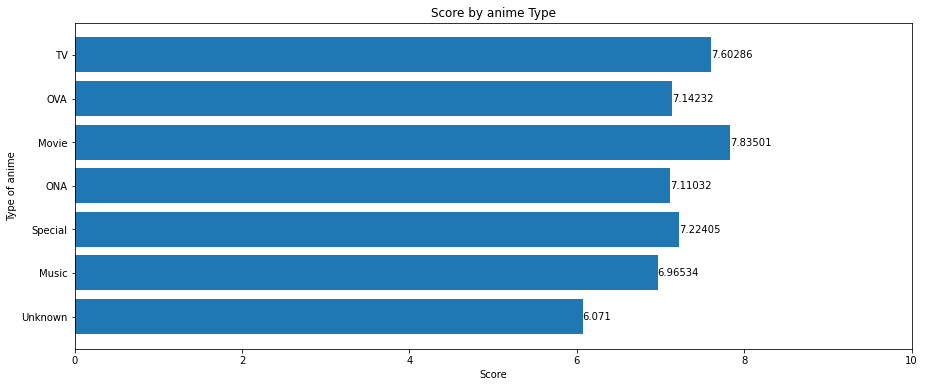

In [6]:
ratings_by_type = data_df.groupby('Type').apply(lambda x: weighted_avg(x, 'Score', 'Scored_Users')).rename('Score').reset_index()
draw_barh_chart(ratings_by_type, 'Type', 'Score', "Score by anime Type", "Score", "Type of anime", (0, 10))

Theo như hình vẽ, ta thấy Movie là dạng được người xem chấm điểm nhiều nhất. Tuy nhiên thì TV là dạng được chấm điểm cao thứ 2 và cách biệt điểm của TV và Movie cũng không nhiều lắm (khoảng 0.23 trên 10), nên cũng có thể khẳng định là người xem đánh giá các chương trình truyền hình hoạt hình có chất lượng tốt.

#### Vẽ biểu đồ cho thấy mức độ yêu thích của người xem với các dạng anime

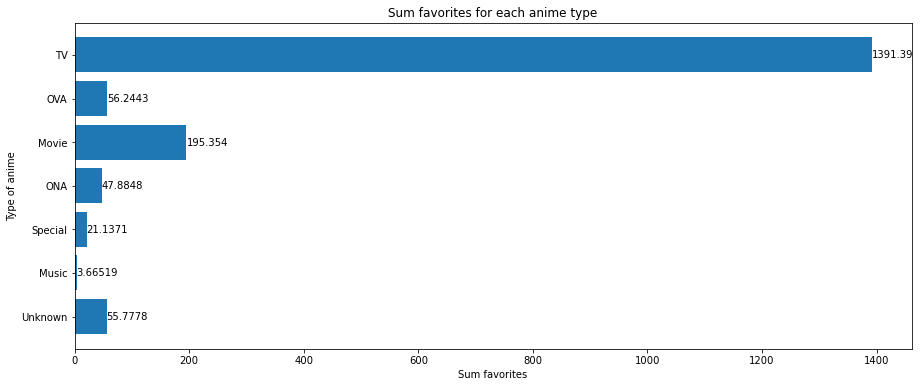

In [7]:
favorites_by_type = data_df.groupby('Type').apply(lambda x: np.sum(x.Favorites) / len(x)).rename('Sum_Favorites').reset_index()
draw_barh_chart(favorites_by_type, 'Type', 'Sum_Favorites', "Sum favorites for each anime type", "Sum favorites", "Type of anime")

Theo như hình vẽ, ta thấy TV là dạng có số lượt yêu thích trên tổng tất cả các phim cao nhất. Do đó số lượng chương trình hoạt hình cho truyền hình cũng chiếm nhiều nhất.

### Câu hỏi 2: Năm nào có nhiều phim ra mắt nhất, nhì,...? 

Đầu tiên, ta xem các cột đã có dữ liệu hợp lí chưa:

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                21460 non-null  int64         
 1   Title             21460 non-null  object        
 2   Synonyms          21460 non-null  object        
 3   Japanese          21460 non-null  object        
 4   English           21460 non-null  object        
 5   Synopsis          21460 non-null  object        
 6   Type              21460 non-null  category      
 7   Episodes          20913 non-null  float64       
 8   Status            21460 non-null  object        
 9   Start_Aired       18072 non-null  datetime64[ns]
 10  End_Aired         8782 non-null   datetime64[ns]
 11  Premiered         21460 non-null  object        
 12  Broadcast         21460 non-null  object        
 13  Producers         21460 non-null  object        
 14  Licensors         2146

Xem số lượng phim ra mắt trong từng năm:

In [9]:
start_aired_df = data_df['Start_Aired'].dt.year.value_counts().rename('Count').reset_index().sort_values('index')
start_aired_df.head()

,index,Count
59,1917.0,11
64,1918.0,8
83,1926.0,1
78,1927.0,2
76,1928.0,2


#### Vẽ biểu đồ thể hiện số lượng qua mỗi năm và giai đoạn 2010 đến 2023:

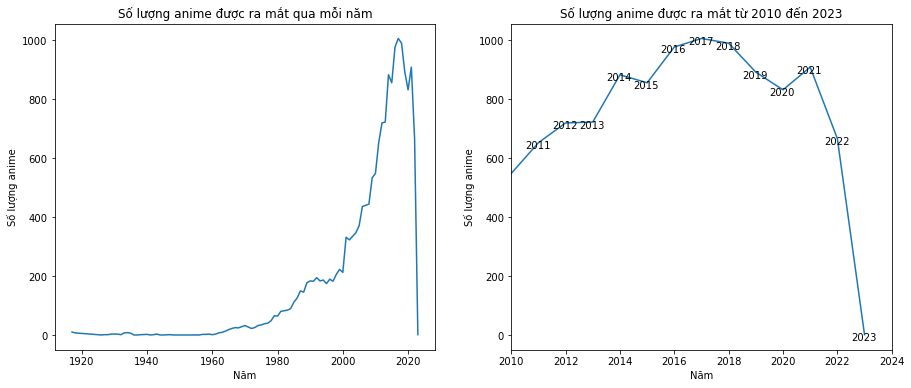

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))
axs[0].plot(start_aired_df['index'], start_aired_df.Count)
axs[0].set_title('Số lượng anime được ra mắt qua mỗi năm')
axs[0].set_xlabel('Năm')
axs[0].set_ylabel('Số lượng anime')

axs[1].plot(start_aired_df['index'], start_aired_df.Count)
axs[1].set_xlim(2010, 2024)
axs[1].set_title('Số lượng anime được ra mắt từ 2010 đến 2023')
axs[1].set_xlabel('Năm')
axs[1].set_ylabel('Số lượng anime')

for ind, row in start_aired_df[(start_aired_df['index'] > 2010) & (start_aired_df['index'] < 2024)].iterrows():
    x = row['index']
    y = row.Count
    axs[1].annotate(str(int(x)), (x - 0.5, y - 20))

Nhận xét:
- Số lượng anime ngày càng nhiều, tăng dần qua các năm và tăng nhanh nhất vào giai đoạn 2000 đến 2018 và giảm đột ngột từ 2019 đến 2022, có thể do ảnh hưởng của dịch covid 19 và giãn cách xã hội nên các nhà làm phim không thể sản xuất các phim trong khoảng thời gian này.
- Năm 2023 số lượng anime giảm mạnh, tuy nhiên thì hiện tại đang là năm 2022 và thời điểm thu thập dữ liệu chưa cập nhật đầy đủ cũng như có nhiều phim đang được sản xuất và chưa hoàn thành.

### Câu hỏi 3: Mùa nào xuất bản nhiều phim nhất? Phim xuất bản trong mùa nào có nhiều người quan tâm?

Đầu tiên ta cần thêm 1 cột "Season" để chứa thông tin về mùa, dữ liệu từ cột này là phần tử trước khoảng trắng trong cột "Premiered".

In [11]:
data_df['Season'] = data_df['Premiered'].str.split(' ').str[0]

Thực hiện thống kê với "sum" là tổng số lượt xem, "count" là số lượng phim, "mean" là lượng xem trung bình của phim.

In [12]:
season_stat = data_df.groupby(['Season'])['Members'].agg(['sum', 'count', 'mean']).reset_index()
season_stat

,Season,sum,count,mean
0,Fall,186151498,1531,121588.176355
1,Spring,191628669,1715,111736.833236
2,Summer,130611864,922,141661.457701
3,Unknown,205997984,16236,12687.729983
4,Winter,128257473,1056,121455.940341


Sau đó ta gán nhãn cho 4 mùa theo thứ tự tăng dần từ 0: "Spring" đến 4: "Unknown" và sắp xếp thứ tự cho dữ liệu dựa trên cột này.

In [13]:
season_stat = season_stat[season_stat['Season'] != 'Unknown']
season_stat = season_stat.reset_index()
season_stat['rank'] = [2, 0, 1, 3]
season_stat = season_stat.sort_values(by = 'rank')
season_stat

,index,Season,sum,count,mean,rank
1,1,Spring,191628669,1715,111736.833236,0
2,2,Summer,130611864,922,141661.457701,1
0,0,Fall,186151498,1531,121588.176355,2
3,4,Winter,128257473,1056,121455.940341,3


**Thực hiện thống kê về số lượng phim được sản xuất trong từng mùa

Text(0.5, 1.0, 'Tỉ lệ số lượng phim xuất bản theo mùa')

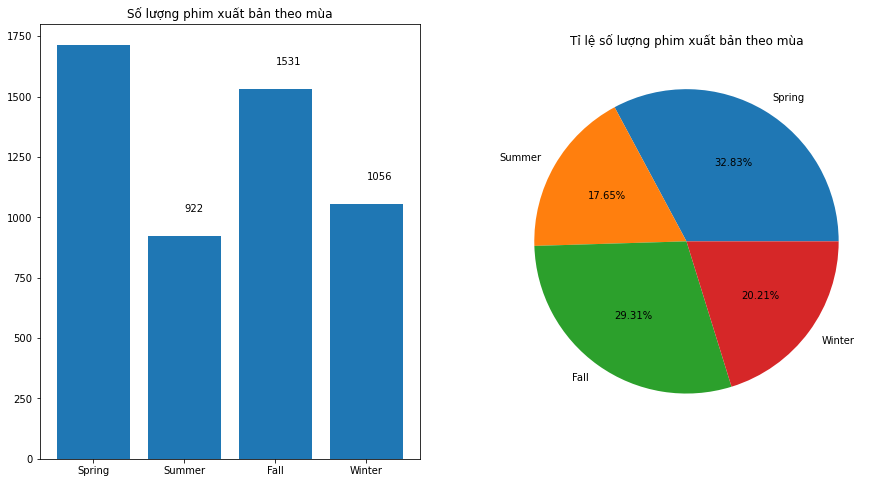

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].bar(data = season_stat, x = 'Season', height = 'count')
axes[0].set_title('Số lượng phim xuất bản theo mùa')
for x in range(len(season_stat['Season'])):
    axes[0].annotate(str(season_stat['count'][x]), xy = (season_stat['Season'][x], season_stat['count'][x] + 100))
    
axes[1].pie(season_stat['count'], labels = season_stat['Season'], autopct='%.2f%%')
axes[1].set_title('Tỉ lệ số lượng phim xuất bản theo mùa')

Nhận xét:
- Các mùa có số lượng phim xuất bản cao và thấp xen kẽ nhau, tập trung chủ yếu vào mùa xuân và thu.

**Thống kê về lượng người quan tâm của phim theo từng mùa**

Text(0.5, 1.0, 'Tỉ lệ tổng số người quan tâm phim chia theo mùa xuất bản')

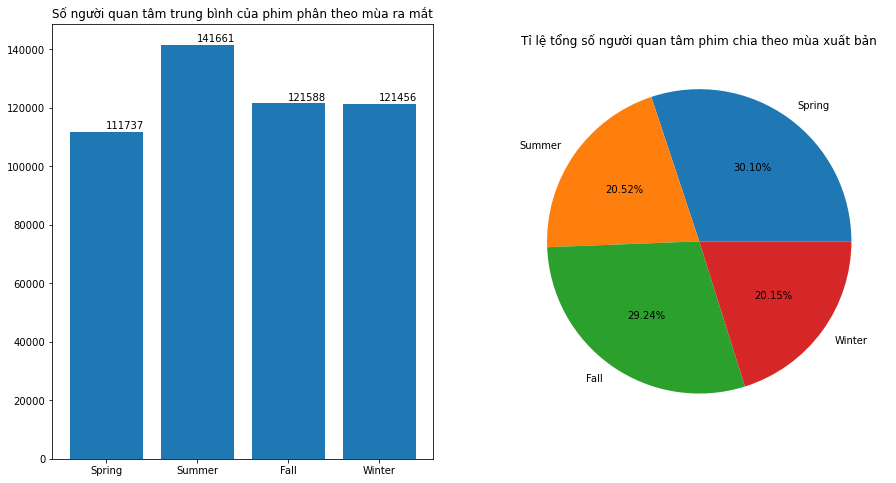

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].bar(data = season_stat, x = 'Season', height = 'mean')
axes[0].set_title('Số người quan tâm trung bình của phim phân theo mùa ra mắt')
for x in range(len(season_stat['Season'])):
    axes[0].annotate(str(round(season_stat['mean'][x])), xy = (season_stat['Season'][x], season_stat['mean'][x] + 1000))

axes[1].pie(season_stat['sum'], labels = season_stat['Season'], autopct='%.2f%%')
axes[1].set_title('Tỉ lệ tổng số người quan tâm phim chia theo mùa xuất bản')

Nhận xét:
- Ở đây ta nhìn thấy được số lượng phim và lượng người quan tâm trung bình tỉ lệ nghịch với nhau, ở trên số lượng phim cao nhất là "Unknown" chiếm hơn 3/4 tổng số thì ở đây số người quan tâm trung bình chỉ đạt 1/11 so với lượt xem của các phim sản xuất vào mùa hè. Mùa xuân có lượng phim xuất bản cao nhất trong 4 mùa nhưng mức độ được quan tâm thì thấp nhấp.
- Điều này có thể lý giải là do các phim Unknown (do không đầy đủ thông tin hoặc một lý do nào đó) là do các nhà hãng phim nhỏ lẻ, không được quảng bá nhiều dẫn đến phim không được nhiều người biết đến.
- Nhờ vào sự chênh lệch lớn về số người quan tâm trung bình nên nhìn chung, tổng số lượt xem của phim theo từng mùa không bị chênh nhau quá nhiều.

### Câu hỏi 4: Chia theo Demographics thì phim nào được sản xuất nhiều nhất? Thể loại nào có nhiều người quan tâm nhất?

Đầu tiên ta hãy xem dữ liệu của cột "Demographics"

In [16]:
demo = data_df['Demographics'].unique()
demo

array(['Shounen', 'Seinen', 'Unknown', 'Shoujo', 'Kids', 'Josei',
       'Kids, Shounen', 'Josei, Shoujo', 'Kids, Seinen', 'Kids, Shoujo'],
      dtype=object)

Hmmm, nhiều dòng có chứa nhiều giá trị như 'Kids, Shounen', 'Josei, Shoujo', 'Kids, Seinen', 'Kids, Shoujo'. Vậy thì ta sẽ thực hiện tách nó ra, nhưng có vẻ sẽ tốn công tách lại 1 lần nữa cho câu hỏi sau nên ta sẽ chuẩn bị dữ liệu cho cả 2 câu hỏi luôn nhé

Thống kê về số lượng phim, tổng số và trung bình số người quan tâm cho từng loại trong Demographics theo từng mùa.

In [17]:
data_df['Demographics'] = data_df['Demographics'].str.split(', ')
data = data_df.explode('Demographics')
data = data.groupby(['Demographics', 'Season'])['Members'].agg(['sum', 'count', 'mean']).reset_index()
data

,Demographics,Season,sum,count,mean
0,Josei,Fall,1462667,13,112512.846154
1,Josei,Spring,1671745,14,119410.357143
2,Josei,Summer,1184619,12,98718.250000
3,Josei,Unknown,708027,49,14449.530612
4,Josei,Winter,1531945,13,117841.923077
5,Kids,Fall,1167834,243,4805.901235
6,Kids,Spring,2008349,316,6355.534810
7,Kids,Summer,237607,122,1947.598361
8,Kids,Unknown,4662347,3484,1338.216705
9,Kids,Winter,421889,159,2653.389937


Như vậy ta đã chuẩn bị xong dữ liệu.

Nhưng dữ liệu cho câu hỏi này không cần chia theo mùa nên ta sẽ thống kê lại từ bộ dữ liệu đã chuẩn bị.

In [18]:
demo_stat = data.groupby(['Demographics'])[['sum', 'count']].sum().reset_index()
demo_stat['mean'] = demo_stat['sum'] / demo_stat['count']
demo_stat

,Demographics,sum,count,mean
0,Josei,6559003,101,64940.623762
1,Kids,8498026,4324,1965.315911
2,Seinen,86828974,909,95521.423542
3,Shoujo,36873230,706,52228.371105
4,Shounen,249696886,2094,119243.976122
5,Unknown,454769163,13426,33872.274914


**Thống kê về lượng phim theo từng thể loại**

Text(0.5, 1.0, 'Tỉ lệ số lượng phim theo đối tượng xem')

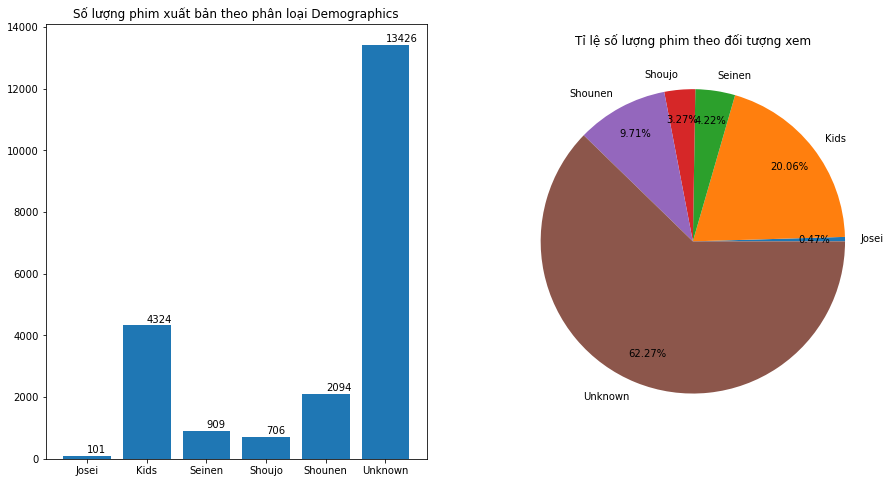

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].bar(data = demo_stat, x = 'Demographics', height = 'count')
axes[0].set_title('Số lượng phim xuất bản theo phân loại Demographics')
for x in range(len(demo_stat['Demographics'])):
    axes[0].annotate(str(round(demo_stat['count'][x])), xy = (demo_stat['Demographics'][x], demo_stat['count'][x] + 100))
    
axes[1].pie(demo_stat['count'], labels = demo_stat['Demographics'], autopct='%.2f%%', pctdistance=0.8)
axes[1].set_title('Tỉ lệ số lượng phim theo đối tượng xem')

Nhận xét:
-  Josei (manga dành cho phụ nữ): có số lượng rất ít 0.47% trong khi đó thể loại tương đương dành cho nam là Seinen có số lượng gấp 9 lần.
- Shoujo (dành cho thiếu nữ) gấp 7 lần Josei nhưng chỉ bằng 1/3 so với thể loại tương đương dành cho nam là Shounen.
- Phim dành cho trẻ em (Kids) có số lượng hơn cả tổng của 4 thể loại trên và bằng 1/3 so với "Unknown".

Như vậy ta có thể suy ra các bộ phim anime được xuất bản nhắm đến đối tượng là trẻ em và giới trẻ (do số lượng phim càng nhiều ở những thể loại dành cho độ tuổi càng nhỏ), bên cạnh đó nhắm đến chủ yếu là phái nam (do anime dành cho nam luôn chiếm số lượng gấp 3 đến 7 lần so với dành cho nữ ở cùng độ tuổi).

**Thống kê về lượt xem theo từng loại**

Text(0.5, 1.0, 'Tỉ lệ số người quan tâm phim chia theo phân loại Demographics')

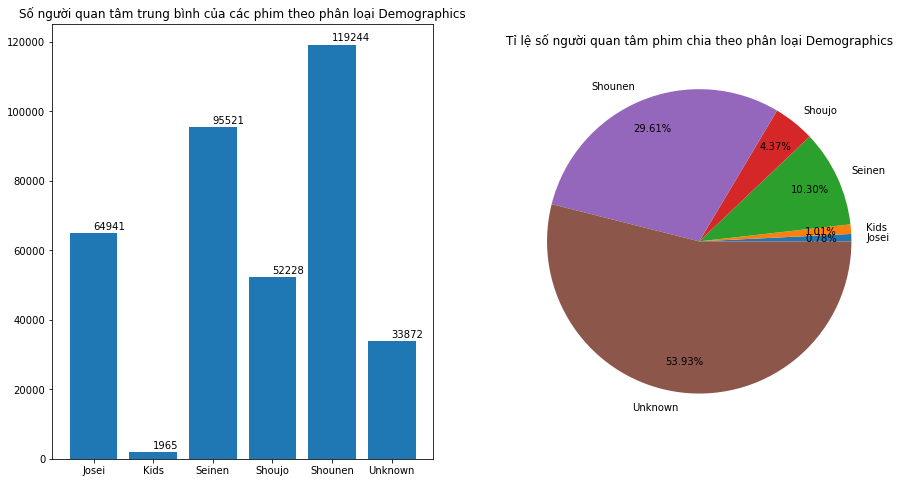

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].bar(data = demo_stat, x = 'Demographics', height = 'mean')
axes[0].set_title('Số người quan tâm trung bình của các phim theo phân loại Demographics')
for x in range(len(demo_stat['Demographics'])):
    axes[0].annotate(str(round(demo_stat['mean'][x])), xy = (demo_stat['Demographics'][x], demo_stat['mean'][x] + 1000))
    
axes[1].pie(demo_stat['sum'], labels = demo_stat['Demographics'], autopct='%.2f%%', pctdistance=0.8)
axes[1].set_title('Tỉ lệ số người quan tâm phim chia theo phân loại Demographics')

Nhận xét:
- Trài ngược với số lượng phim, lượng người quan tâm trung bình của Unknown và Kids là thấp nhất. Cao nhất là các thể loại dành cho nam, như vậy cũng dễ hiểu khi mà các anime dành cho nam được phát hành nhiều hơn.
- Tuy lượng quan tâm trung bình thấp nhưng nhờ vào số lượng nhiều mà Unknown chiếm hơn 50% tổng số lượt quan tâm xem anime. Sau đó là đến nhóm dành cho nam, cho nữ và cuối cùng là trẻ em.

### Câu hỏi 5: Vậy mỗi quan hệ giữa 2 cột Demographics và Season là gì?

Đầu tiên ta sẽ thêm cột rank để sort thứ tự cho các mùa nhé.

In [21]:
merge_data = pd.merge(data, season_stat[['Season', 'rank']], how = 'left')
merge_data = (merge_data.sort_values(by = ['Demographics', 'rank'])).dropna()
merge_data

,Demographics,Season,sum,count,mean,rank
1,Josei,Spring,1671745,14,119410.357143,0.0
2,Josei,Summer,1184619,12,98718.250000,1.0
0,Josei,Fall,1462667,13,112512.846154,2.0
4,Josei,Winter,1531945,13,117841.923077,3.0
6,Kids,Spring,2008349,316,6355.534810,0.0
7,Kids,Summer,237607,122,1947.598361,1.0
5,Kids,Fall,1167834,243,4805.901235,2.0
9,Kids,Winter,421889,159,2653.389937,3.0
11,Seinen,Spring,22571489,121,186541.231405,0.0
12,Seinen,Summer,15708047,71,221240.098592,1.0


In [22]:
demo_val = demo_stat['Demographics'].values.tolist() 

**Hãy cùng xem thử đối với từng đối tượng trong cột Demographics thường được phát hành vào mùa nào trong năm và phát hành vào mùa nào sẽ được đón nhận hơn nhé.**

Text(0.5, 1.05, 'Biểu đồ số lượng phim phát hành theo mùa phát hành và Demographics')

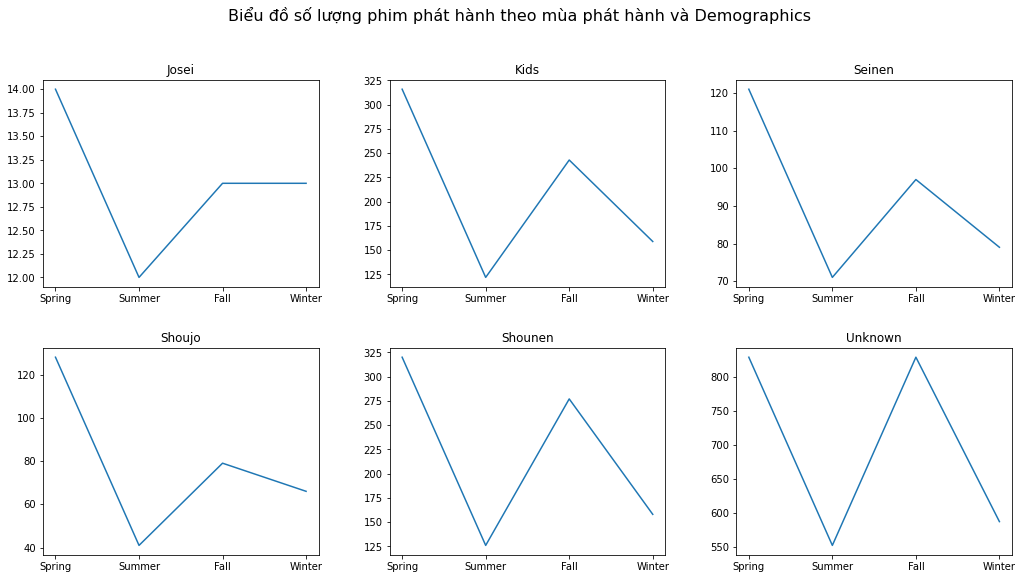

In [23]:
my_xticks = season_stat['Season'].values.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.tight_layout(pad = 4)
for i in range(len(demo_val)):
    temp = merge_data[(merge_data['Demographics'] == demo_val[i]) & (merge_data['rank'] < 4)]
    axes[i // 3][i % 3].plot(temp['rank'], temp['count'])
    axes[i // 3][i % 3].set_title(demo_val[i])
    
    axes[i // 3][i % 3].yaxis.get_major_formatter().set_scientific(False)
    axes[i // 3][i % 3].yaxis.get_major_formatter().set_useOffset(False)
    axes[i // 3][i % 3].set_xticks(range(4))
    axes[i // 3][i % 3].set_xticklabels(my_xticks)
fig.suptitle('Biểu đồ số lượng phim phát hành theo mùa phát hành và Demographics', fontsize = 16, y = 1.05)

Nhận xét:
-  Nhìn vào biểu đồ ta có thể thấy được điểm chung là ở hầu hết các thể loại, anime không xác định được mùa phát hành chiếm số lượng lớn. Nhưng vì chênh lệch quá lớn nên không thể quan sát được 4 mùa, vậy nên ta sẽ bỏ cột này đi.
- Trong các phim xác định được mùa phát hành thì mùa xuân chiếm số lượng lớn nhất, chênh lệch lượt phát hành vào mùa xuân và mùa hạ là lớn nhất trong mọi biểu đồ, trong đó tỉ lệ chênh lệch lớn nhất là Kids, Shoujo, Shounen gấp 3 lần.
- Biểu đồ đạt đỉnh ở mùa xuân và mùa thu, đáy là mùa hạ và mùa đông.

Text(0.5, 1.05, 'Biểu đồ lượng người quan tâm trung bình của các phim chia theo Demographics và mùa phát hành')

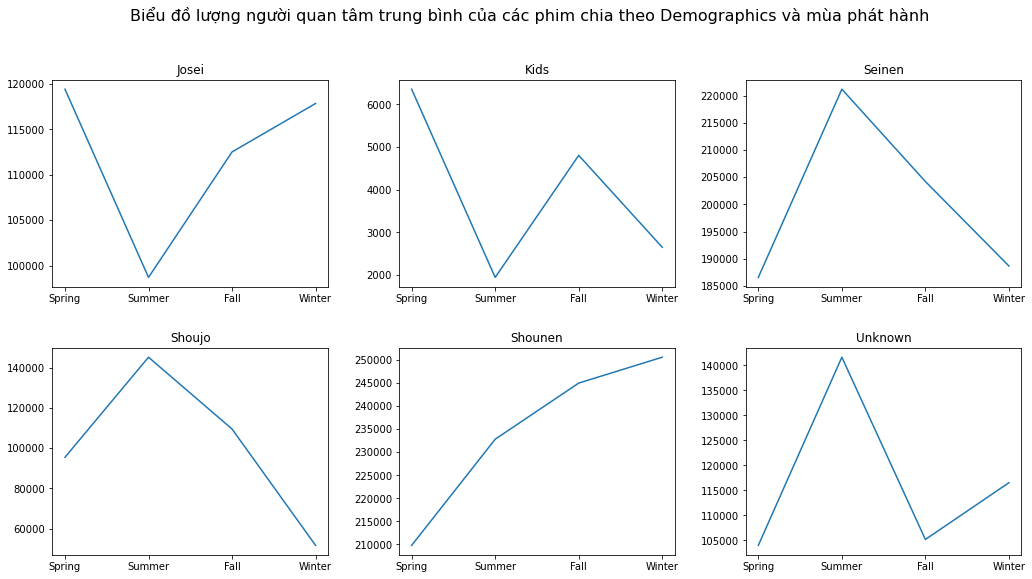

In [24]:
my_xticks = season_stat['Season'].values.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.tight_layout(pad = 4)
for i in range(len(demo_val)):
    temp = merge_data[(merge_data['Demographics'] == demo_val[i]) & (merge_data['rank'] < 4)]
    axes[i // 3][i % 3].plot(temp['rank'], temp['mean'])
    axes[i // 3][i % 3].set_title(demo_val[i])
    
    axes[i // 3][i % 3].yaxis.get_major_formatter().set_scientific(False)
    axes[i // 3][i % 3].yaxis.get_major_formatter().set_useOffset(False)
    axes[i // 3][i % 3].set_xticks(range(4))
    axes[i // 3][i % 3].set_xticklabels(my_xticks)
fig.suptitle('Biểu đồ lượng người quan tâm trung bình của các phim chia theo Demographics và mùa phát hành', fontsize = 16, y = 1.05)

Nhận xét:
- Trong các phim xác định được mùa, tùy theo đối tượng mà đồ thị ở mùa hè sẽ đạt đáy (Josei, Kids) hay đạt đỉnh (Shoujo, Seinen, Unknown). Ở mùa đông sẽ đạt đáy (Shoujo, Kids, Seinen) hay đạt đỉnh (Josei, Shounen)
- Có sự chênh lệch lớn giữa các mùa phát hành ở nhóm Shoujo (hè gấp 3 lần đông) và Kids (xuân gấp 3 lần hè).

### Câu hỏi 6: Chủ đề nào thường có những phim hay ?

Trả lời câu hỏi trên sẽ giúp những người đang tìm kiếm anime hay để xem sẽ có những gợi ý rõ ràng hơn để tìm kiếm phim xem.

Để đánh giá một bộ phim có hay hay là không thì mỗi nơi, mỗi người sẽ có cách đánh giá khác nhau. Đối với nhóm, một bộ phim được xem là hay nếu nó nằm trong 10% có điểm cao nhất và số người thêm nó vào danh sách anime của mình phải lớn hơn 100000 (để đảm bảo kết quả đánh giá là chính xác). 

Như đã nói trên, một bộ phim hay thì không chỉ phụ thuộc vào số điểm mà còn phụ thuộc vào số người thêm nó vào danh sách anime của mình. Vì vậy để trả lời câu hỏi này thì cần phải nêu rõ số bộ phim anime hay ứng với mỗi chủ đề và số thành viên trung bình của các bộ phim đó

Đầu tiên, ta phải lọc các bộ anime thỏa mãn điều kiện trên

In [25]:
high_score = data_df["Score"].quantile(0.9)
ques1_df = data_df[data_df['Score'] >= high_score ]
ques1_df = ques1_df[ques1_df["Members"] > 100000]

In [26]:
ques1_df["Themes"] = ques1_df['Themes'].str.split(', ')

In [27]:
themes_explode = ques1_df.explode("Themes")
#Loại bỏ các themes là Unknown
themes_explode = themes_explode[themes_explode['Themes'] != 'Unknown']
themes_explode.head(5)
#Xem thử kết quả sau khi explode

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites,Season
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,[Shounen],24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695,Spring
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,[Shounen],24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695,Spring
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,[Shounen],24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695,Spring
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,2006-10-04,...,[Shounen],23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701,Fall
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,2009-04-05,...,[Shounen],24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772,Spring


Tiếp theo, cần tính số thành viên trung bình của các bộ phim theo chủ đề

In [28]:
avg_member_by_theme = themes_explode.groupby("Themes")['Members'].mean().astype(int).sort_values(ascending = False)
avg_member_by_theme.head(15)

Themes
Survival            1206873
Gore                 931774
Time Travel          827691
Super Power          681498
Psychological        657617
Military             656020
Romantic Subtext     655133
Martial Arts         625931
Crossdressing        624942
Reincarnation        602629
Medical              594921
Educational          594921
Isekai               592563
Delinquents          591162
Video Game           578045
Name: Members, dtype: int64

Tiếp theo, ta tính số bộ phim hay ứng với mỗi chủ đề

In [29]:
highscore_by_theme = themes_explode.groupby('Themes')['Score'].count().sort_values(ascending = False)
highscore_by_theme.head(15)

Themes
School           187
Psychological     77
Historical        72
Adult Cast        58
Mythology         57
Super Power       56
Military          50
Isekai            48
Gag Humor         43
Mecha             37
Iyashikei         36
Music             34
Parody            30
Love Polygon      28
Gore              27
Name: Score, dtype: int64

Cuối cùng, vẽ biểu đồ.

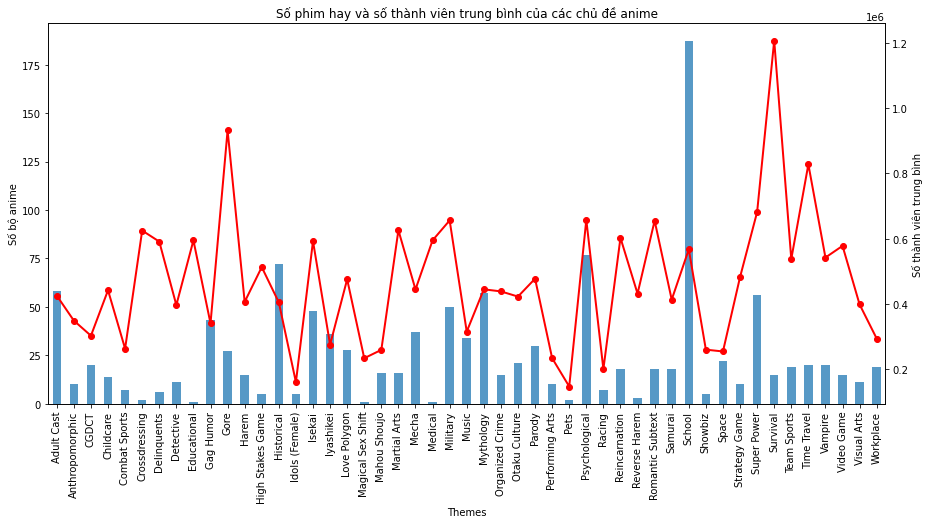

In [30]:
highscore_by_theme = highscore_by_theme.sort_index()
avg_member_by_theme = avg_member_by_theme.sort_index()
#Vẽ biêu đồ
fig = plt.figure(figsize = (15,7))
ax1 = (highscore_by_theme).plot(kind = 'bar', rot = 90, alpha = 0.75)
ax1.set_ylabel("Số bộ anime")

ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), avg_member_by_theme, linestyle='-',  
         marker='o', linewidth=2.0, color = 'red')
ax2.set_ylabel('Số thành viên trung bình')
plt.title("Số phim hay và số thành viên trung bình của các chủ đề anime")


plt.show()

Nhận xét:
- Chủ đề survival và gore có số phim hay không nhiều, nhưng số thành viên trung bình của nó rất cao, chứng tỏ mọi người đều rất hóng những bộ phim có chủ đề như thế này (Ít bộ nhưng bộ nào chất bộ đó)
- Chủ đề School có cực kỳ nhiều phim hay, ai đang rảnh thì có thể cày phim của chủ đề này.
- Chủ đề idol (Female) và Chủ đề pets có không có nhiều phim hay lắm, mà có thì số thành viên thêm nó vào danh sách của mình cũng rất ít, có lẽ sẽ nên xem các phim khác hơn.
- Ba thể loại Historical, Pssychological, School là 3 thể loại có nhiều phim hay nhất.
- Ba thể loại Survial, Gore, Time Travel là 3 thể loại được hóng nhất (số thành viên đông nhất).
- Biểu đồ của số thành viên trung bình và số phim hay rất khác nhau, không phải chủ đề nào có nhiều phim hay thì chủ đề đó được nhiều thành viên chú ý. 

### Câu hỏi 7: Anime như thế nào thì dễ trở nên nổi tiếng (được nhiều người biết đến)?

Để trả lời cho câu hỏi trên, đầu tiên chúng ta cần lấy ra bộ dữ liệu gồm các anime nổi tiếng. Nhóm em quyết định nếu anime nằm trong 5% tương đương 1000 anime xếp theo `Popularity` trong bộ dữ liệu thì có thể được tính là anime nổi tiếng.

Ở câu hỏi này, chúng ta sẽ quan tâm đến 3 thông tin: (Bởi vì bộ dữ liệu cũng còn 3 thông tin này dùng được cho câu hỏi, các thông tin khác nếu có dùng được cũng đã sử dụng cho các câu hỏi phía trên rồi)
- Anime về chủ đề gì? (Giá trị ở cột `Themes`)
- Anime thuộc thể loại nào? (Giá trị ở cột `Genres`)
- Anime hướng đến độ tuổi nào? (Giá trị ở cột `Rating`)


Giá trị ở 2 cột `Themes` và `Genres` đều có kiểu chuỗi, chuỗi này mang nhiều giá trị, mỗi giá trị cách nhau bởi dấu ",". Chúng ta cần viết hàm để tách chuỗi này để tiện xử lý hơn.

In [31]:
def split_str(s):
    result = s.split(',')
    for i in range(len(result)):
        result[i] = result[i].strip()
    return result

Ngoài ra, chúng ta còn cần 1 hàm vẽ biểu đồ

In [32]:
def draw_bar_chart(data, title, xlabel, ylabel):
    plt.barh(data.keys(),data.values, height = 0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Hiển nhiên chúng ta có thể xét trên toàn bộ dữ liệu để tìm đặc điểm chung của tất cả anime, nếu mặc định các anime nổi tiếng sẽ nằm trong các đặc điểm chung đó, nhưng liệu nó có chắc sẽ đúng?

Việc chúng ta sẽ làm là tính số các anime thuộc các chủ đề (Thể loại, độ tuổi) khác nhau. Căn cứ vào các chủ đề (Thể loại, độ tuổi) chiếm tỉ lệ lớn, chúng ta sẽ rút ra được đặc điểm chung của các anime nổi tiếng.

**Anime nổi tiếng thường thuộc chủ đề nào?**

Có rất nhiều chủ đề khác nhau, chúng ta cũng không cần thiết phải biểu diễn tất cả, chỉ cần chọn ra những cái có tỉ lệ cao, vì mục đích của chúng ta là tìm điểm chung. Trong trường hợp này thì nhóm em chọn 25 chủ đề đầu tiên

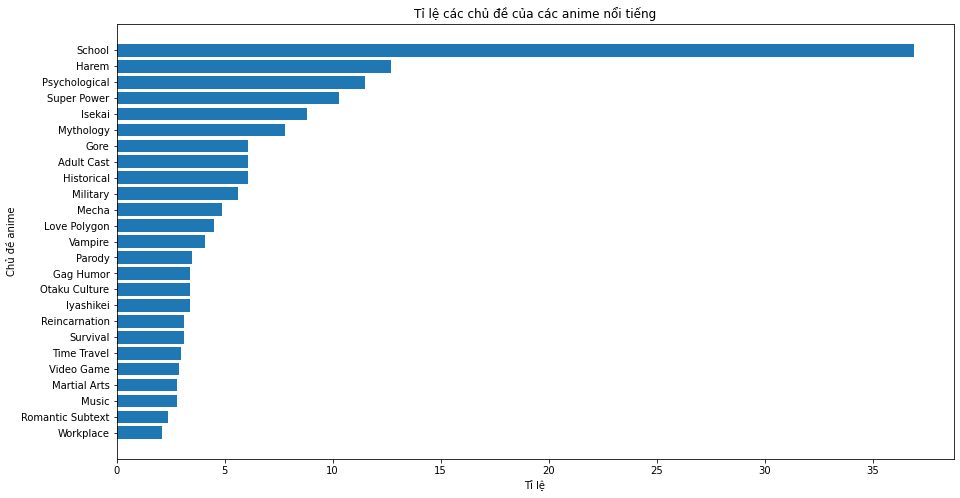

School              36.9
Harem               12.7
Psychological       11.5
Super Power         10.3
Isekai               8.8
Mythology            7.8
Gore                 6.1
Adult Cast           6.1
Historical           6.1
Military             5.6
Mecha                4.9
Love Polygon         4.5
Vampire              4.1
Parody               3.5
Gag Humor            3.4
Otaku Culture        3.4
Iyashikei            3.4
Reincarnation        3.1
Survival             3.1
Time Travel          3.0
Video Game           2.9
Martial Arts         2.8
Music                2.8
Romantic Subtext     2.4
Workplace            2.1
Name: Themes, dtype: float64

In [33]:
df = data_df[data_df['Popularity']<1000]
df = df[df['Themes']!='Unknown']

size = df.shape[0]
df['Themes'] = df['Themes'].apply(split_str)
df = df.explode('Themes')
data = (df['Themes'].value_counts() / size * 100).round(1)[:25]

plt.figure(figsize = (15, 8))
draw_bar_chart(data.sort_values(), 'Tỉ lệ các chủ đề của các anime nổi tiếng', 'Tỉ lệ', 'Chủ đề anime')
data

Ở thông tin liên quan đến chủ đề đã bắt đầu xuất hiện các chủ đề có số anime mang tính "áp đảo" so với các chủ đề khác. Đây là điều tốt trong việc xác định đặc điểm chung cho các anime nổi tiếng. Hơn nữa, qua đây chúng ta đã thấy rất rõ các đặc điểm điểm chung của tất cả anime không giống với đặc điểm của anime với anime nổi tiếng!! Ở bước khám phá dữ liệu chúng ta đã biết tỉ lệ của mỗi giá trị trong mỗi cột. 

Tiếp đến là thông tin liên quan đến thể loại anime.

**Anime nổi tiếng thường thuộc thể loại nào**

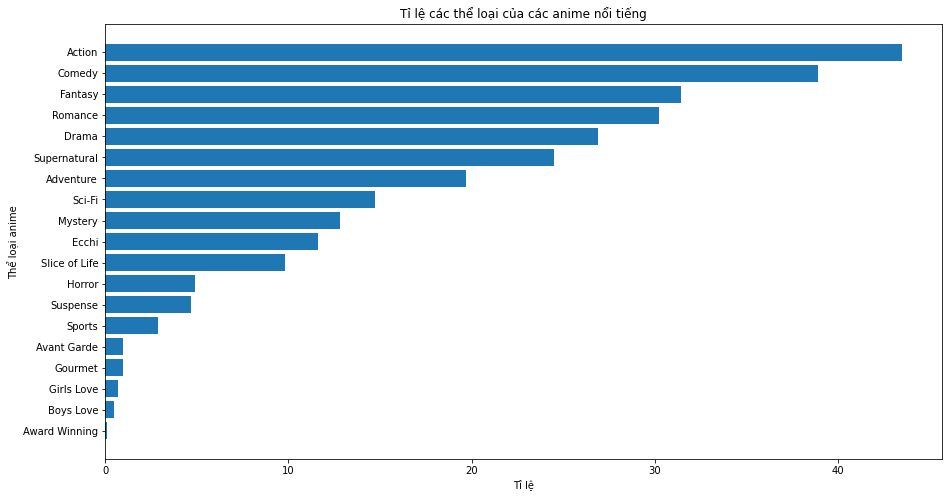

Action           43.5
Comedy           38.9
Fantasy          31.4
Romance          30.2
Drama            26.9
Supernatural     24.5
Adventure        19.7
Sci-Fi           14.7
Mystery          12.8
Ecchi            11.6
Slice of Life     9.8
Horror            4.9
Suspense          4.7
Sports            2.9
Avant Garde       1.0
Gourmet           1.0
Girls Love        0.7
Boys Love         0.5
Award Winning     0.1
Name: Genres, dtype: float64

In [34]:
df = data_df[data_df['Popularity']<1000]
df = df[df['Genres']!='Unknown']

size = df.shape[0]
df['Genres'] = df['Genres'].apply(split_str)
df = df.explode('Genres')

data = (df['Genres'].value_counts() / size * 100).round(1)

plt.figure(figsize = (15, 8))
draw_bar_chart(data.sort_values(), 'Tỉ lệ các thể loại của các anime nổi tiếng', 'Tỉ lệ', 'Thể loại anime')
data

Ở thông tin liên quan đến thể loại,chúng ta tiếp tục thấy sự chênh lệch rõ ràng giữa 2 nhóm: 1 nhóm chiếm tỉ lệ lớn và nhóm còn lại chiếm tỉ lệ rất nhỏ.

Cuối cùng là thông tin liên quan đến độ tuổi phù hợp xem anime.

**Anime nổi tiếng thường dành cho độ tuổi nào**

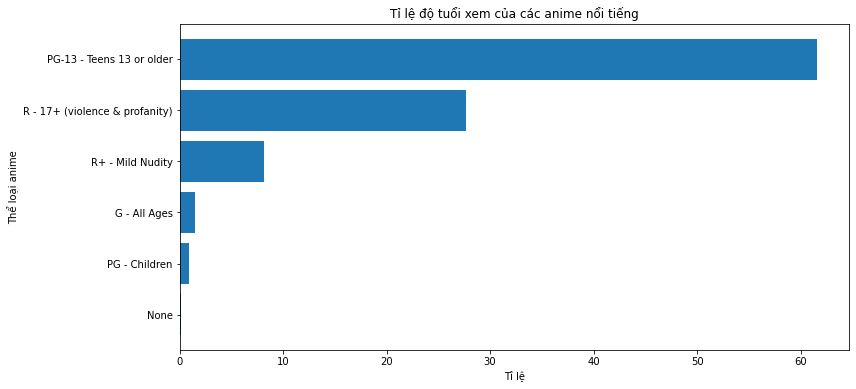

PG-13 - Teens 13 or older         61.6
R - 17+ (violence & profanity)    27.7
R+ - Mild Nudity                   8.2
G - All Ages                       1.5
PG - Children                      0.9
None                               0.1
Name: Rating, dtype: float64

In [35]:
df = data_df[data_df['Popularity']<1000]
size = df.shape[0]
data = (df['Rating'].value_counts() / size * 100).round(1)
plt.figure(figsize = (12, 6))
draw_bar_chart(data.sort_values(), 'Tỉ lệ độ tuổi xem của các anime nổi tiếng', 'Tỉ lệ', 'Thể loại anime')
data

**Nhận xét:**
- Các anime nổi tiếng đa số có một số đặc điểm như liên quan đến trường học (có lẽ là do độ tuổi xem phim đa số là tuổi đi học?), main chính và dàn Harem của mình, hay là các bộ phim chuyển sinh đến thế giới khác với nhiều sức mạnh cấp SSS, đi đập nhau auto win.
- Cũng có thể là các bộ phim tâm lý, tình cảm nhưng đa số đều có các yếu tố hài hước, lãng mạn và rất nhiều thứ Fantasy. (cái nhận xét này là cái quan trọng nhất)
- Ở cột Rating (Theo Description trên Kaggle thì nó là Age rate) thì lại cho ta biết các bộ phim nổi tiếng thường nhắm vào độ tuổi teen, 1 bộ phận khác rất nhiều là hướng đến đối tượng "violence & profanity", tạm dịch thì có thể xem đây là những bộ phim đánh nhau (có lẽ các hiệu ứng đánh nhau trong phim thường xem rất sướng?).
- Có một chi tiết nữa siêu quan trọng của các anime nổi tiếng mà trong bộ dữ liệu đã không đề cập đến nhưng không thể thiếu đó là tạo hình nhân vật phải thật dễ thương, phải thật dễ thương xem mới dễ nghiện.